# **Import module**

In [7]:
# Import module
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.diagnostic import linear_reset #Ramsey RESET test
from statsmodels.stats.stattools import jarque_bera # Residual Normality test
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF for multicollinearity
from statsmodels.stats.diagnostic import het_breuschpagan #BP test for heteroskedasticity

# **Build server and read file data**


In [8]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Statistic and visualiztion (file HTML)**
[Link drive](https://drive.google.com/drive/folders/1oGVsqMCqUOr6ROBRxY326GE2VPDPdMNO?usp=sharing)

In this folder, there are file data and file HTML(you need to download to see)

# **Treating outliers**

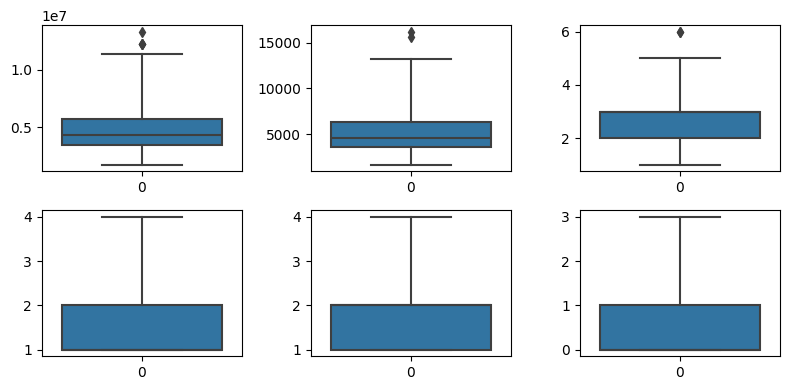

In [9]:
fig,axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(df['price'], ax = axs[0,0], whis = 2.5)
plt2 = sns.boxplot(df['area'], ax = axs[0,1], whis = 2.5)
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2], whis = 2.5)
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0], whis = 2.5)
plt2 = sns.boxplot(df['stories'], ax = axs[1,1], whis = 2.5)
plt3 = sns.boxplot(df['parking'], ax = axs[1,2], whis = 2.5)
plt.tight_layout()

#Copy code của Lộc
# Price và Area nhiều Outlier nên đứa nào làm phần này thì xử lý đi nhé

In [10]:
#Outlier treatment for Price
df = df.sort_values(by='price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 2.5*IQR) & (df['price'] <= Q3 + 2.5*IQR)]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [11]:
#Outlier treatment for Area
df = df.sort_values(by= 'area')
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['area'] >= Q1 - 2.5*IQR) & (df['area'] <= Q3 +2.5*IQR)]


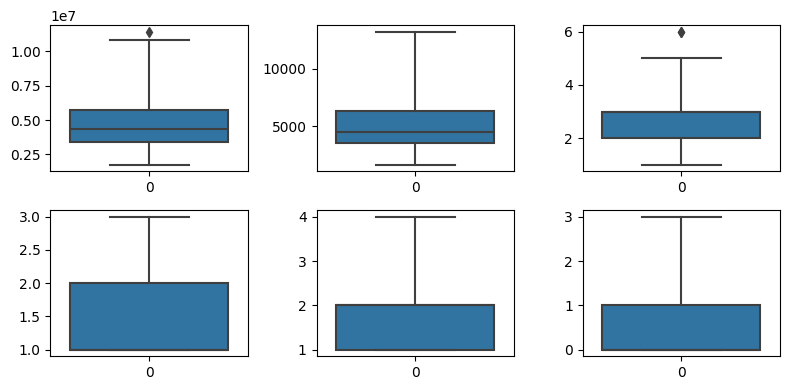

In [12]:
#After treating outlier
df = df.reset_index(drop=True)
fig,axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(df['price'], ax = axs[0,0], whis = 2.5)
plt2 = sns.boxplot(df['area'], ax = axs[0,1], whis = 2.5)
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2], whis = 2.5)
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0], whis = 2.5)
plt2 = sns.boxplot(df['stories'], ax = axs[1,1], whis = 2.5)
plt3 = sns.boxplot(df['parking'], ax = axs[1,2], whis = 2.5)
plt.tight_layout()

# **Visualization**

In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000
mean,4.697142e+06,5086.094620,2.955473,1.274583,1.799629,0.679035
std,1.740584e+06,2058.684072,0.732835,0.482716,0.864801,0.848652
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,0.000000
50%,4.319000e+06,4510.000000,3.000000,1.000000,2.000000,0.000000
75%,5.696250e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.141000e+07,13200.000000,6.000000,3.000000,4.000000,3.000000


C:\Users\24h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


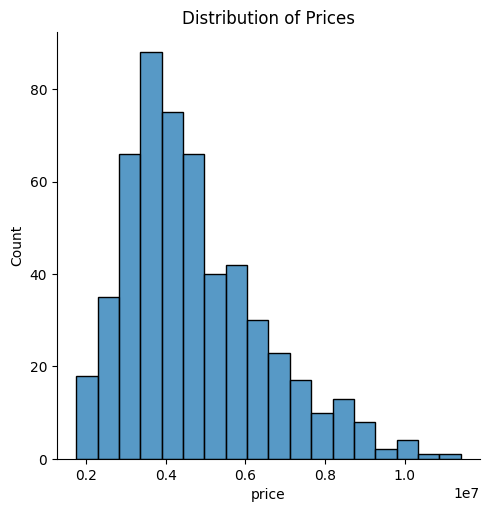

In [14]:
sns.displot(df, x = 'price')
plt.title('Distribution of Prices')
plt.show()

C:\Users\24h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\24h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\24h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

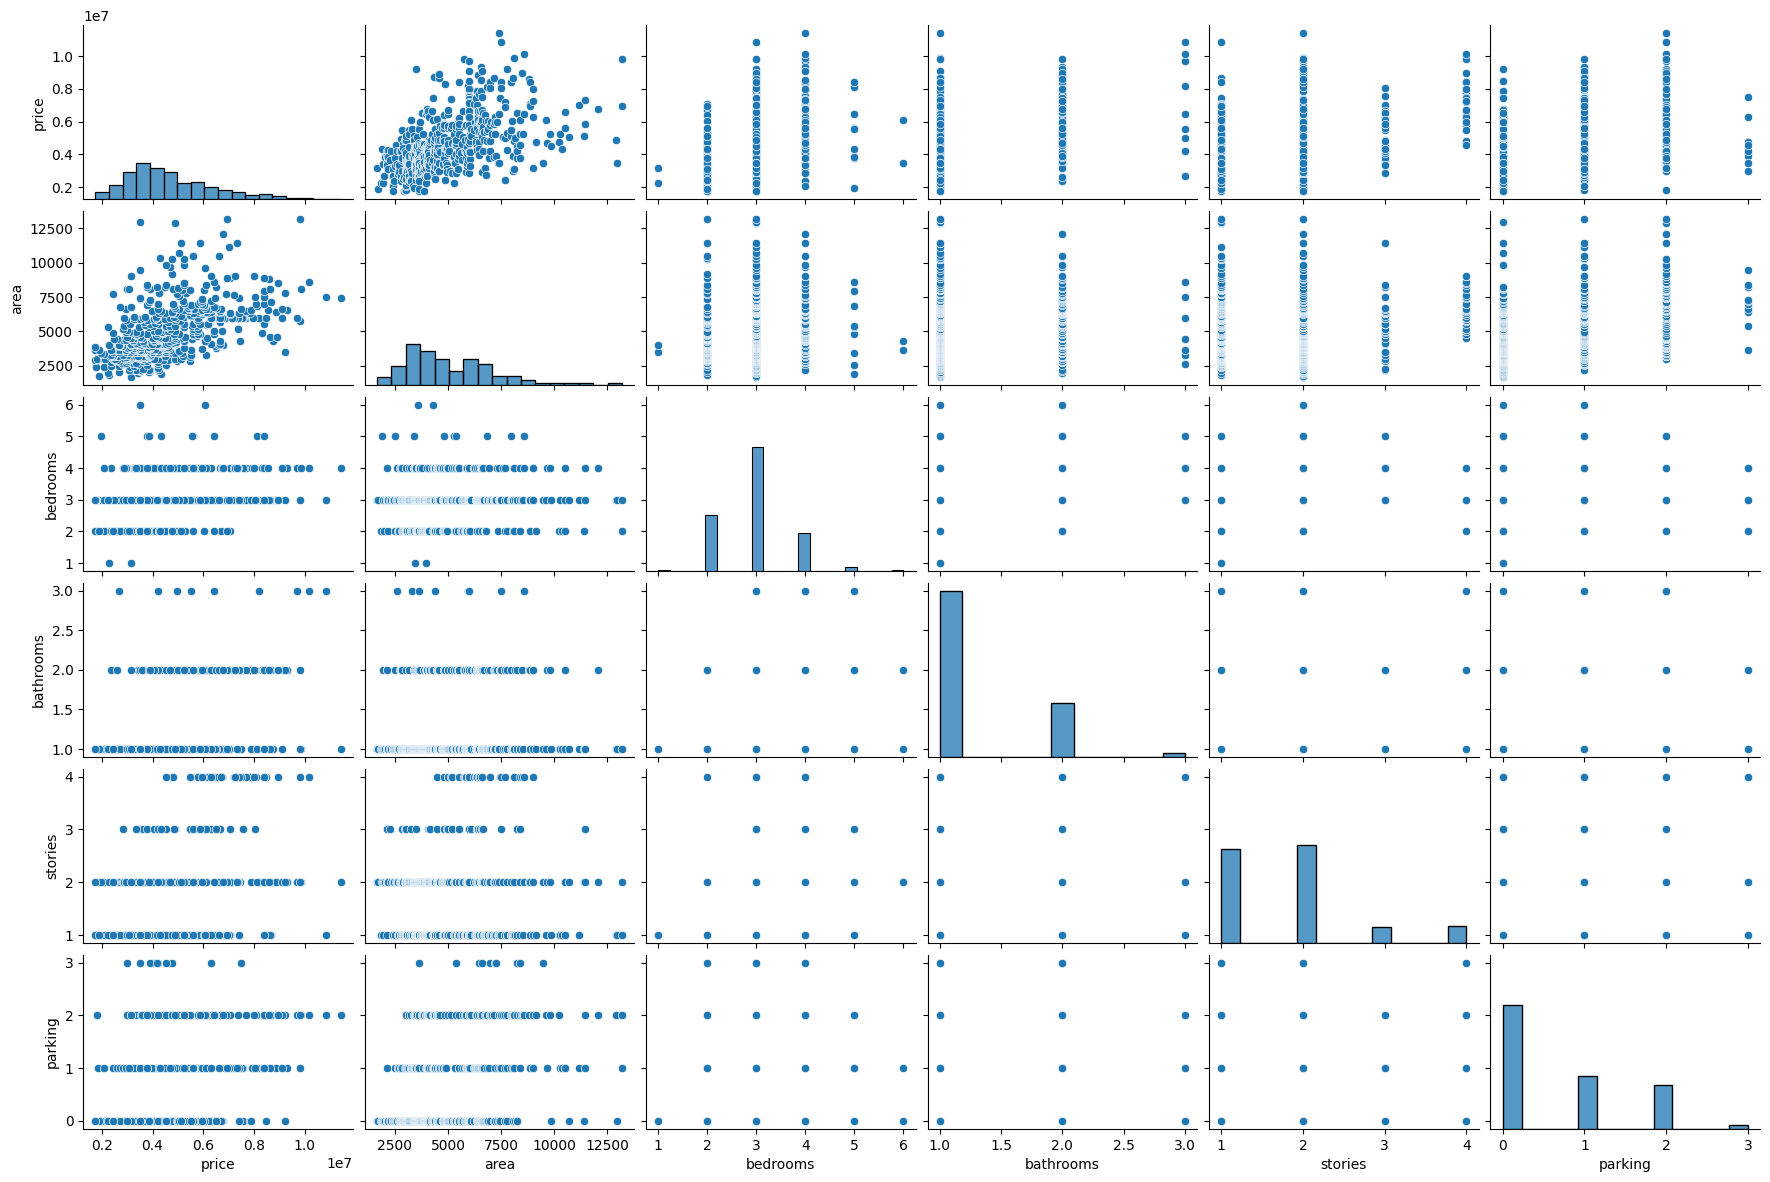

In [15]:
sns.pairplot(df,  size=2.0, aspect=1.5)
plt.show()

# **Preprocessing**



### Now we convert all string columns into integer value

In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for x in varlist:
    df[x] = df[x].map({'yes' : 1, 'no':0})

### The variable furnishingstatus has three levels. We need to convert these levels into integer as well. For this, we will use dummy variables.

In [17]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status = status.replace({True: 1, False: 0})
df = pd.concat([df, status], axis = 1)
df = df.drop('furnishingstatus', axis = 1)
df.head()

C:\Users\24h\AppData\Local\Temp\ipykernel_15508\1544755600.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  status = status.replace({True: 1, False: 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,3150000,1650,3,1,2,0,0,1,0,0,0,0,0,1
1,1890000,1700,3,1,2,1,0,0,0,0,0,0,0,1
2,2275000,1836,2,1,1,0,0,1,0,0,0,0,1,0
3,4340000,1905,5,1,2,0,0,1,0,0,0,0,1,0
4,3430000,1950,3,2,2,1,0,1,0,0,0,1,0,1


# **Model building**

In [18]:
np.random.seed(0)
df_train, df_test = train_test_split(df, test_size = 0.2, random_state =100)

### After that, we will scale all the numerical columns using MinMaxScaler()

In [19]:
numerical_columns = ['area','stories', 'bedrooms', 'bathrooms', 'parking']
scaling = MinMaxScaler().fit(df_train[numerical_columns])
df_train[numerical_columns] = scaling.transform(df_train[numerical_columns])
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,4.310000e+02,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,4.706664e+06,0.293489,0.391183,0.146172,0.266048,0.856148,0.178654,0.343387,0.041763,0.322506,0.227378,0.241299,0.422274,0.317865
std,1.755103e+06,0.172631,0.146323,0.244907,0.290877,0.351347,0.383508,0.475391,0.200280,0.467979,0.285504,0.428369,0.494496,0.466188
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.482500e+06,0.166840,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.270000e+06,0.248485,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.600000e+06,0.383550,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.141000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


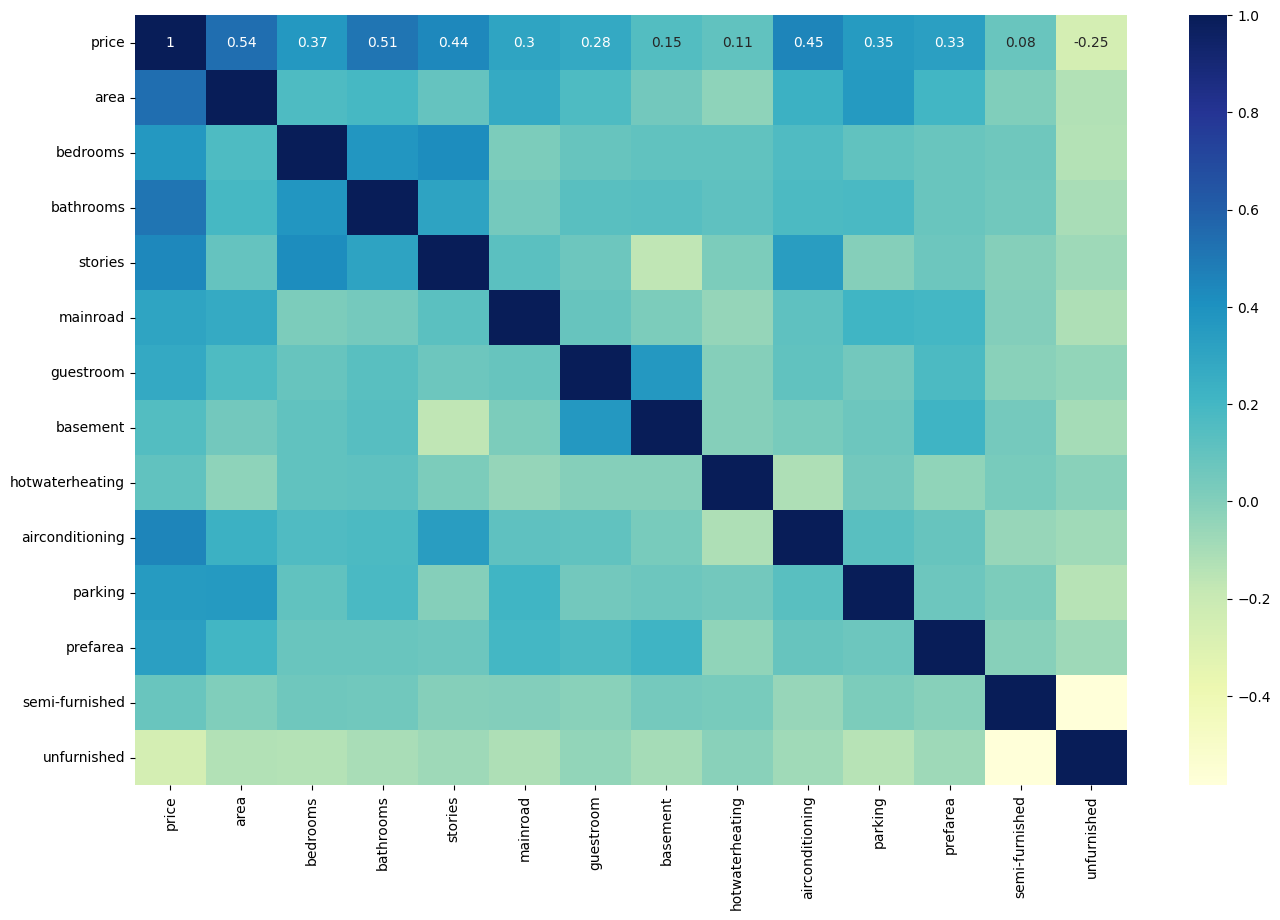

In [20]:
#Heatmap to show correlation of df_train
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [21]:
#Get x_train, y_train from df_train
X_train = df_train.drop('price', axis =1)
y_train = np.log(df_train['price'])


In [22]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
125,0.161039,0.4,0.0,0.666667,1,0,0,0,0,0.000000,0,1,0
373,0.376623,0.4,0.5,1.000000,1,0,0,0,1,0.000000,0,0,1
43,0.104416,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,0,0
133,0.163636,0.2,0.0,0.000000,0,1,1,0,0,0.000000,0,1,0
389,0.380087,0.4,0.0,0.000000,1,0,0,0,0,0.666667,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.766234,0.2,0.0,0.000000,1,0,0,0,0,0.333333,0,1,0
53,0.116883,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,1
350,0.359307,0.4,0.0,0.000000,1,0,0,1,0,0.666667,0,1,0
79,0.129870,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0


### *Model in case of full variables*

In [23]:
X_train1 = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     70.88
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.10e-97
Time:                        22:16:45   Log-Likelihood:                 80.941
No. Observations:                 431   AIC:                            -133.9
Df Residuals:                     417   BIC:                            -76.96
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.7241      0.045    330.789      0.000      14.637      14.812
area                0.6077      0.066      9.262      0.000       0.479       0.737
bedrooms            0.1096      0.080      1.378      0.169      -0.047       0.266
bathrooms           0.3253      0.046      7.115      0.000       0.235       0.415
stories             0.2608      0.042      6.188      0.000       0.178       0.344
mainroad            0.1174      0.030      3.895      0.000       0.058       0.177
guestroom           0.0907      0.028      3.211      0.001       0.035       0.146
basement            0.0482      0.024      2.020      0.044       0.001       0.095
hotwaterheating     0.1699      0.050      3.379      0.001       0.071       0.269
airconditioning     0.1619      0.023      6.929      0.000       0.116       0.208
parking             0.1335      0.038      3.512      0.000       0.059       0.208
prefarea            0.1281      0.024      5.240      0.000       0.080       0.176
semi-furnished      0.0371      0.025      1.496      0.136      -0.012       0.086
unfurnished        -0.1018      0.027     -3.790      0.000      -0.155      -0.049
==============================================================================
Omnibus:                        4.221   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.487
Skew:                          -0.135   Prob(JB):                        0.106
Kurtosis:                       3.421   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see from the OLS Regression Result:**

$P_{value}$ of {Bedrooms,  Semi-furnished} > 0.05, so we can remove 2 variables from model

In [24]:
X_train2 = sm.add_constant(X_train.drop(['bedrooms', 'semi-furnished'], axis = 1))
model_2 = sm.OLS(y_train, X_train2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     82.96
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.61e-98
Time:                        22:16:45   Log-Likelihood:                 78.801
No. Observations:                 431   AIC:                            -133.6
Df Residuals:                     419   BIC:                            -84.81
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.7860      0.032    460.508      0.000      14.723      14.849
area                0.6144      0.065      9.383      0.000       0.486       0.743
bathrooms           0.3417      0.045      7.647      0.000       0.254       0.430
stories             0.2806      0.039      7.130      0.000       0.203       0.358
mainroad            0.1123      0.030      3.730      0.000       0.053       0.172
guestroom           0.0882      0.028      3.116      0.002       0.033       0.144
basement            0.0530      0.024      2.237      0.026       0.006       0.100
hotwaterheating     0.1763      0.050      3.508      0.001       0.078       0.275
airconditioning     0.1580      0.023      6.774      0.000       0.112       0.204
parking             0.1327      0.038      3.489      0.001       0.058       0.207
prefarea            0.1270      0.024      5.183      0.000       0.079       0.175
unfurnished        -0.1279      0.022     -5.906      0.000      -0.170      -0.085
==============================================================================
Omnibus:                        4.602   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.149
Skew:                          -0.126   Prob(JB):                       0.0762
Kurtosis:                       3.472   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Inference statistics and Testing assumptions**

## 1. RAMSEY's RESET test

In [25]:
reset = linear_reset(model_2, power=2, use_f = True)
print("Ramsey's RESET test F-statistic: ", reset.fvalue)
print("P-value: ", reset.pvalue)
threshold = 0.05

Ramsey's RESET test F-statistic:  2.5527571332614953
P-value:  0.11085759583295644


In [26]:
if reset.pvalue > threshold:
  print("No error, no omitted variable")
else:
  print("There's an error and one or many omitted variables")


No error, no omitted variable


## 2. Normality of residuals

In [27]:
residual = model_2.resid
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = jarque_bera(residual)
list(zip(name, test))

[('Jarque-Bera', 5.148786580441863),
 ('Chi^2 two-tail prob.', 0.07620004008643824),
 ('Skew', -0.12599157022915675),
 ('Kurtosis', 3.4724530350348486)]

In [28]:
p_val = test[1]
print(p_val)
if p_val > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are NOT normally distributed")

0.07620004008643824
Residuals are normally distributed


C:\Users\24h\AppData\Local\Temp\ipykernel_15508\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)
C:\Users\24h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

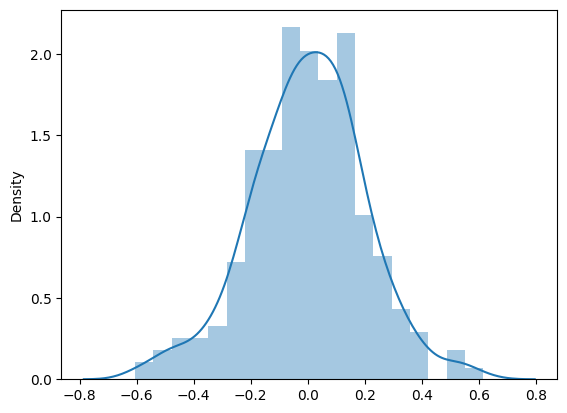

In [29]:
sns.distplot(residual)

## 3. Multicollinearity test

In [30]:
vif = pd.DataFrame()
vif["Features"] = X_train.drop(['bedrooms', 'semi-furnished'], axis = 1).columns
sh = X_train.drop(['bedrooms', 'semi-furnished'], axis = 1).shape
vif["VIF"] = ([variance_inflation_factor(X_train.drop(['bedrooms', 'semi-furnished'], axis = 1).values,i) for i in range(sh[1])])
vif = vif.sort_values(by='VIF',ascending=True)
vif



,Features,VIF
6,hotwaterheating,1.075591
10,unfurnished,1.327806
4,guestroom,1.466993
9,prefarea,1.484927
1,bathrooms,1.672285
7,airconditioning,1.809489
5,basement,1.835645
8,parking,1.985780
2,stories,2.370443
0,area,4.582861


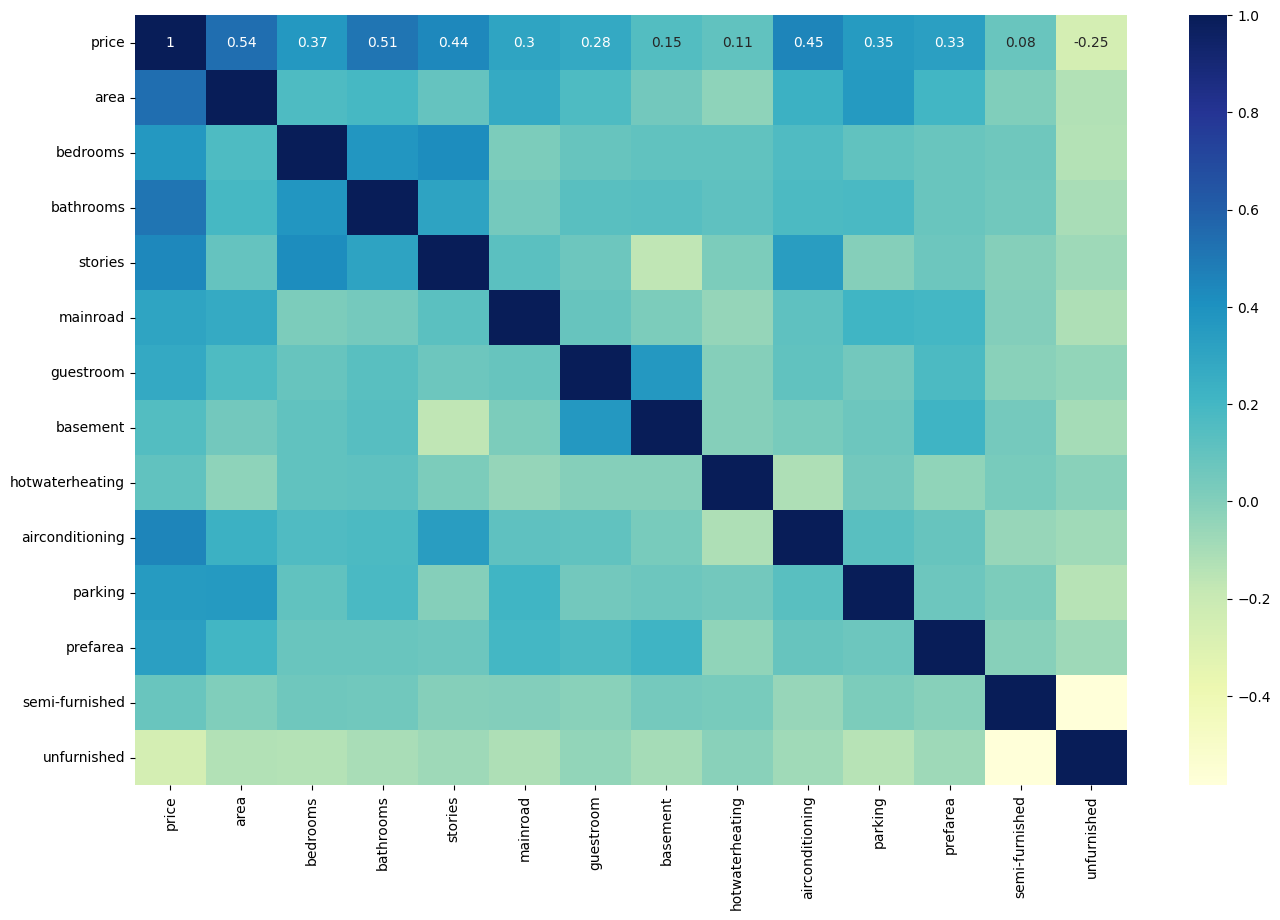

In [31]:
#Heatmap to show correlation of df_train
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
from sklearn.metrics import r2_score
y_prediction = model_2.predict(X_train2)
print(f"R^2 Score: {r2_score(y_train, y_prediction)}")

R^2 Score: 0.6853246683811463


### We can see from the heatmap that the **correlation** of each pair $(x_i, x_j)$ is not larger than $R^2$.

## 4. Heteroskedasticity

### BP test

In [33]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = het_breuschpagan(model_2.resid, model_2.model.exog)

list(zip(names, test_result))

[('Lagrange multiplier statistic', 16.56709122256586),
 ('p-value', 0.12134903750599793),
 ('f-value', 1.5226965626864697),
 ('f p-value', 0.12031264396438601)]

In [34]:
pval = test_result[1]
if pval < 0.05:
    print("Homoskedasticity is violated.")
else:
    print("Homoskedasticity assumption is not violated.")
print(pval)



Homoskedasticity assumption is not violated.
0.12134903750599793


# **Model Evaluation**




### Apply the scaling on test set

In [35]:
num_vars = ['area','stories', 'bedrooms', 'bathrooms', 'parking']
df_test[num_vars] = scaling.transform(df_test[num_vars])
df_test.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.659140e+06,0.313495,0.390741,0.101852,0.268519,0.861111,0.185185,0.379630,0.064815,0.268519,0.222222,0.194444,0.398148,0.370370
std,1.688836e+06,0.199134,0.148221,0.224225,0.278918,0.347443,0.390259,0.487557,0.247347,0.445255,0.273434,0.397618,0.491798,0.485155
min,1.767150e+06,0.004329,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.255000e+06,0.166667,0.350000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.532500e+06,0.246753,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,0.433333,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,9.100000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,4.310000e+02,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,4.706664e+06,0.293489,0.391183,0.146172,0.266048,0.856148,0.178654,0.343387,0.041763,0.322506,0.227378,0.241299,0.422274,0.317865
std,1.755103e+06,0.172631,0.146323,0.244907,0.290877,0.351347,0.383508,0.475391,0.200280,0.467979,0.285504,0.428369,0.494496,0.466188
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.482500e+06,0.166840,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.270000e+06,0.248485,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.600000e+06,0.383550,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.141000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Generate x_test , y_test from test set
y_test = np.log(df_test['price'])

x_test = df_test.drop('price' , axis = 1)

### Creating x_test_RFE

In [38]:
x_test_2 = x_test.drop(['bedrooms', 'semi-furnished'], axis = 1)
x_test_2 = sm.add_constant(x_test_2)

### Making prediction

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_prediction = model_2.predict(x_test_2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_prediction)

print("Mean Squared Error (MSE):", mse)



Mean Squared Error (MSE): 0.0460103516847564


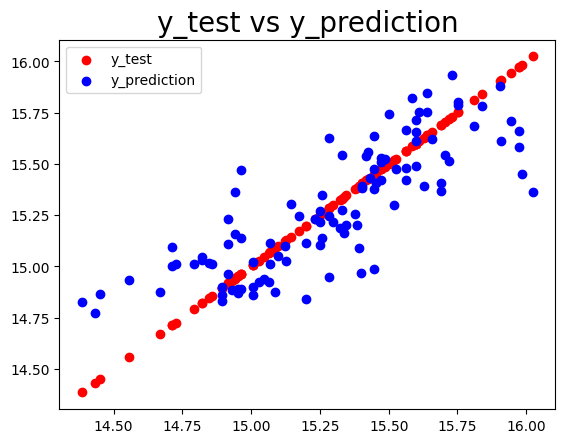

In [40]:
fig = plt.figure()

# Biểu đồ cho y_test
plt.scatter(y_test, y_test, color='red', label='y_test')

# Biểu đồ cho y_pred
plt.scatter(y_test, y_prediction, color='blue', label='y_prediction')

plt.legend()
plt.title('y_test vs y_prediction', fontsize=20)

plt.show()

  **The model is: $log(Price) = 14.7860 + 0.6144*area + 0.3417*bathrooms + 0.2806*stories + 0.1123*mainroad + 0.0882*guestroom + 0.1763*hotwaterheating + 0.1580*airconditioning + 0.1327*parking + 0.1270*prefarea -0.1279*unfurnised$**